importacao de biblioticas


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px



Importacao e limpeza de dados


In [3]:

pla_fib_1 = pd.read_csv('Lab2\PLA FIBRA DE CARBONO\PLA FIBRA DE CARBONO_1_2.csv', encoding='utf-8', delimiter=';')    
pla_fib_2 = pd.read_csv('Lab2\PLA FIBRA DE CARBONO\PLA FIBRA DE CARBONO_2_2.csv', encoding='utf-8', delimiter=';') 
pla_fib_3 = pd.read_csv('Lab2\PLA FIBRA DE CARBONO\PLA FIBRA DE CARBONO_3_2.csv', encoding='utf-8', delimiter=';') 


pla_norm_1 = pd.read_csv('Lab2\PLA Tenacidade à fratura\PLA NORMAL C-FISSURA_1_2.csv', encoding='utf-8', delimiter=';', skip_blank_lines=True)    
pla_norm_2 = pd.read_csv('Lab2\PLA Tenacidade à fratura\PLA NORMAL C-FISSURA_2_2.csv', encoding='utf-8', delimiter=';', skip_blank_lines=True) 
pla_norm_3 = pd.read_csv('Lab2\PLA Tenacidade à fratura\PLA NORMAL C-FISSURA_3_2.csv', encoding='utf-8', delimiter=';', skip_blank_lines=True) 

pla_fibs = [pla_fib_1, pla_fib_2, pla_fib_3]
pla_norms = [pla_norm_1, pla_norm_2, pla_norm_3]


for i in range(len(pla_fibs)):
    pla_fibs[i] = pla_fibs[i].drop(0)
    pla_fibs[i] = pla_fibs[i].map(lambda x: x.replace(',', '.').replace('"', '') if isinstance(x, str) else x)
    pla_fibs[i] = pla_fibs[i].astype(float)
    print(pla_fibs[i].columns)

for i in range(len(pla_norms)):
    pla_norms[i] = pla_norms[i].drop(0)
    pla_norms[i] = pla_norms[i].map(lambda x: x.replace(',', '.').replace('"', '') if isinstance(x, str) else x)
    pla_norms[i] = pla_norms[i].astype(float)





Index(['Tempo', ' Deslocamento', ' Força', ' Tensão à flexão'], dtype='object')
Index(['Tempo', ' Deslocamento', ' Força', ' Tensão à flexão'], dtype='object')
Index(['Tempo', ' Deslocamento', ' Força', ' Tensão à flexão'], dtype='object')


In [ ]:
pla_fibs[1].columns

Geracao de dados importantes


In [ ]:
for i in range(len(pla_fibs)):

    tensao = pla_fibs[i][' Tensão à flexão']
    deformacao = pla_fibs[i][' Deslocamento']

    linear_region = pla_fibs[i][pla_fibs[i][' Deslocamento'] < 0.02]
    delta_tension = pla_fibs[i][' Tensão à flexão'].iloc[-1] - pla_fibs[i][' Tensão à flexão'].iloc[0]
    delta_strain = pla_fibs[i][' Deslocamento'].iloc[-1] - pla_fibs[i][' Deslocamento'].iloc[0]
    modulo_elasticidade = delta_tension / delta_strain

    resistencia_maxima = tensao.max()

    deformacao_maxima = deformacao[tensao.idxmax()]

    resistencia_ruptura = tensao.iloc[-1]

    deformacao_ruptura = deformacao.iloc[-1]

    tenacidade = np.trapz(tensao, deformacao)

    print(f"Sample {i+1}:")
    print(f" - Módulo de Elasticidade: {modulo_elasticidade:.2f} MPa")
    print(f" - Resistência Máxima: {resistencia_maxima:.2f} MPa")
    print(f" - Deformação na Resistência Máxima: {deformacao_maxima:.4f}")
    print(f" - Resistência na Ruptura: {resistencia_ruptura:.2f} MPa")
    print(f" - Deformação na Ruptura: {deformacao_ruptura:.4f}")
    print(f" - Tenacidade: {tenacidade:.2f} J/m³")
    print("-" * 40)

Plotagem dos graficos


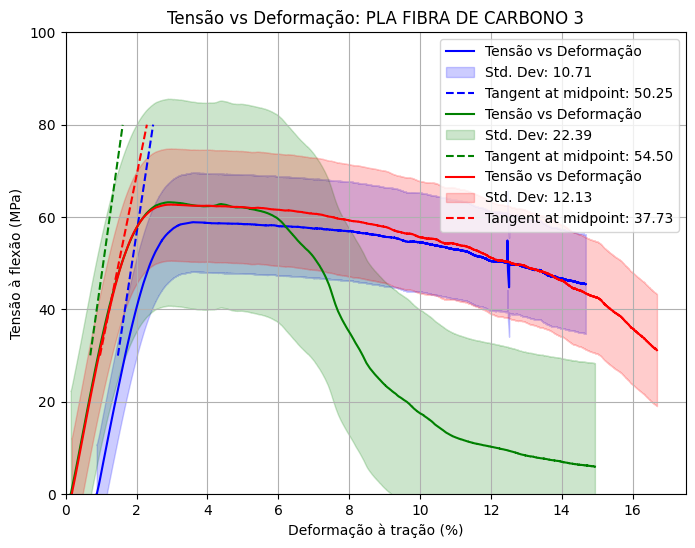

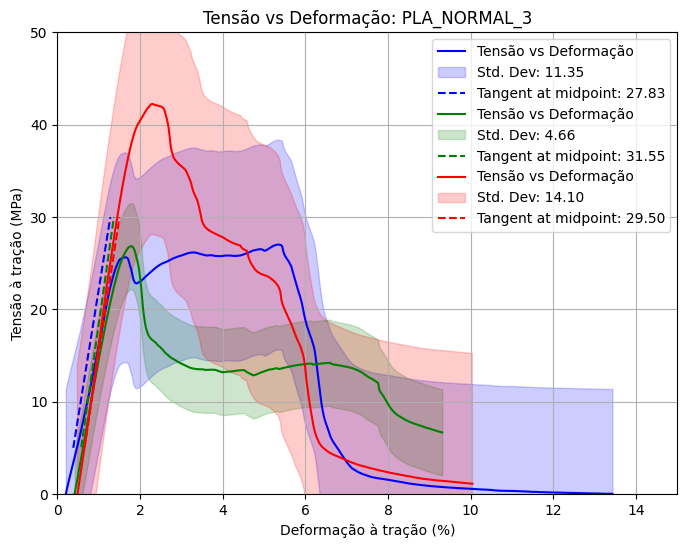

In [19]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# First figure for 'pla_fibs' data
plt.figure(figsize=(8, 6))
for i in range(len(pla_fibs)):
    deslocamento = pla_fibs[i][' Deslocamento']
    tensao_flexao = pla_fibs[i][' Tensão à flexão']

    # Filter data from 0 to 2.5
    '''
    mask = (deslocamento >= 0) & (deslocamento <= 2.5)
    deslocamento = deslocamento[mask]
    tensao_flexao = tensao_flexao[mask]
    '''
    
    # Plot main data
    plt.plot(deslocamento, tensao_flexao, label='Tensão vs Deformação', color=colors[i])
    
    # Calculate standard deviation and fill
    std_dev = np.std(tensao_flexao)
    plt.fill_between(deslocamento, tensao_flexao - std_dev, tensao_flexao + std_dev,
                     color=colors[i], alpha=0.2, label=f'Std. Dev: {std_dev:.2f}')


    # Calculate tangent line at the middle point
    mid_idx = 2  # index for the middle point
    x0, y0 = deslocamento[mid_idx], tensao_flexao[mid_idx]
    slope, intercept = np.polyfit(deslocamento[mid_idx-1:mid_idx+2], tensao_flexao[mid_idx-1:mid_idx+2], 1)
    tangent_line = slope * (deslocamento - x0) + y0

  # Limit tangent line values between y = 40 and y = 80
    mask = (tangent_line >= 30) & (tangent_line <= 80)
    deslocamento = deslocamento[mask]
    tangent_line = tangent_line[mask]


    # Plot tangent line
    plt.plot(deslocamento, tangent_line, '--', color=colors[i], label=f'Tangent at midpoint: {slope:.2f}')
    plt.xlim(0, 17.5)
    plt.ylim(0, 100)

    # Add labels, grid, title, and legend
    plt.xlabel('Deformação à tração (%)')
    plt.ylabel('Tensão à flexão (MPa)')
    plt.title(f'Tensão vs Deformação: PLA FIBRA DE CARBONO {i + 1}')
    plt.grid(True)
    plt.legend()
    plt.savefig(f'Lab2\\figs/PLA_FIBRA_DE_CARBONO_{i + 1}.png')

# Second figure for 'pla_norms' data
plt.figure(figsize=(8, 6))
for i in range(len(pla_norms)):
    deslocamento = pla_norms[i][' Deslocamento']
    tensao_flexao = pla_norms[i][' Tensão à flexão']

    # Plot main data
    plt.plot(deslocamento, tensao_flexao, label='Tensão vs Deformação', color=colors[i])
    
    # Calculate standard deviation and fill
    std_dev = np.std(tensao_flexao)
    plt.fill_between(deslocamento, tensao_flexao - std_dev, tensao_flexao + std_dev,
                     color=colors[i], alpha=0.2, label=f'Std. Dev: {std_dev:.2f}')

    # Calculate tangent line at the middle point
    mid_idx = 3  # index for the middle point
    x0, y0 = deslocamento[mid_idx], tensao_flexao[mid_idx]
    # Use numpy's polyfit to get the slope of the tangent line at the middle point
    slope, intercept = np.polyfit(deslocamento[mid_idx-1:mid_idx+2], tensao_flexao[mid_idx-1:mid_idx+2], 1)
    tangent_line = slope * (deslocamento - x0) + y0


    # Limit tangent line values between y = 40 and y = 80
    mask = (tangent_line >= 5) & (tangent_line <= 30)
    deslocamento = deslocamento[mask]
    tangent_line = tangent_line[mask]

    # Plot tangent line
    plt.plot(deslocamento, tangent_line, '--', color=colors[i], label=f'Tangent at midpoint: {slope:.2f}')
    plt.xlim(0, 15)
    plt.ylim(0, 50)

    # Add labels, grid, title, and legend
    plt.xlabel('Deformação à tração (%)')
    plt.ylabel('Tensão à tração (MPa)')
    plt.title(f'Tensão vs Deformação: PLA_NORMAL_{i + 1}')
    plt.grid(True)
    plt.legend()
    plt.savefig(f'Lab2\\figs/PLA_NORMAL_{i + 1}.png')
